# Explore here

In [134]:
# Your code here
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


# modelado
from sklearn.model_selection import train_test_split

# escalado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# selecicon
from sklearn.feature_selection import f_classif, SelectKBest

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep=";")
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [135]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [136]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [137]:
duplicados1 = df[df.duplicated()]
print(duplicados1)

       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retired    single    uni

In [138]:
duplicados = df.duplicated()
numeros_duplicados = duplicados.sum()
print(numeros_duplicados)

12


In [139]:
df_sin_duplicados = df.drop_duplicates()
df_sin_duplicados.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [140]:
df_sin_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [141]:
df_sin_duplicados.drop(["marital", "contact", "month", "day_of_week", "campaign", "pdays", "previous", "cons.price.idx","cons.conf.idx", "nr.employed"], axis = 1, inplace = True)
df_sin_duplicados.head()

/tmp/ipykernel_671/620293915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_duplicados.drop(["marital", "contact", "month", "day_of_week", "campaign", "pdays", "previous", "cons.price.idx","cons.conf.idx", "nr.employed"], axis = 1, inplace = True)


,age,job,education,default,housing,loan,duration,poutcome,emp.var.rate,euribor3m,y
0,56,housemaid,basic.4y,no,no,no,261,nonexistent,1.1,4.857,no
1,57,services,high.school,unknown,no,no,149,nonexistent,1.1,4.857,no
2,37,services,high.school,no,yes,no,226,nonexistent,1.1,4.857,no
3,40,admin.,basic.6y,no,no,no,151,nonexistent,1.1,4.857,no
4,56,services,high.school,no,no,yes,307,nonexistent,1.1,4.857,no


In [142]:
df_sin_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           41176 non-null  int64  
 1   job           41176 non-null  object 
 2   education     41176 non-null  object 
 3   default       41176 non-null  object 
 4   housing       41176 non-null  object 
 5   loan          41176 non-null  object 
 6   duration      41176 non-null  int64  
 7   poutcome      41176 non-null  object 
 8   emp.var.rate  41176 non-null  float64
 9   euribor3m     41176 non-null  float64
 10  y             41176 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.8+ MB


---------------ANALISIS UNIVARIANTE------------------
ANALISIS UNIVARIANTE CATEGORICAS


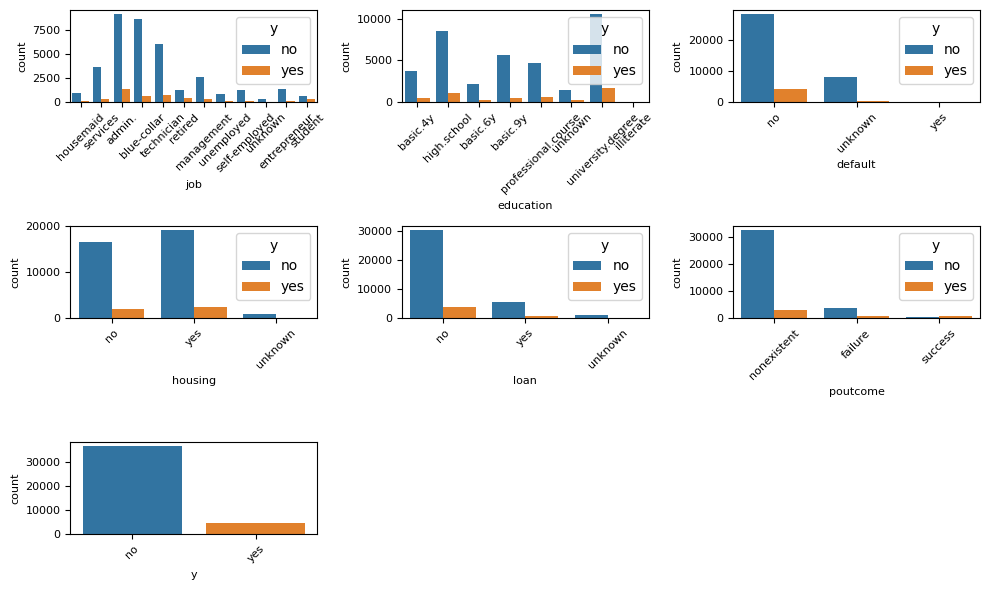

In [143]:
print("---------------ANALISIS UNIVARIANTE------------------\nANALISIS UNIVARIANTE CATEGORICAS")

df_sin_duplicados.job.value_counts()
df_sin_duplicados.education.value_counts()
df_sin_duplicados.default.value_counts()
df_sin_duplicados.housing.value_counts()
df_sin_duplicados.loan.value_counts()
df_sin_duplicados.poutcome.value_counts()
df_sin_duplicados.y.value_counts()
fig, axis = plt.subplots(3, 3, figsize = (10, 6))
sns.countplot(ax = axis[0, 0], data = df_sin_duplicados, x = "job", hue = "y")
sns.countplot(ax = axis[0, 1], data = df_sin_duplicados, x = "education", hue = "y")
sns.countplot(ax = axis[0, 2], data = df_sin_duplicados, x = "default", hue = "y")
sns.countplot(ax = axis[1, 0], data = df_sin_duplicados, x = "housing", hue = "y")
sns.countplot(ax = axis[1, 1], data = df_sin_duplicados, x = "loan", hue = "y")
sns.countplot(ax = axis[1, 2], data = df_sin_duplicados, x = "poutcome", hue = "y")
sns.countplot(ax = axis[2, 0], data = df_sin_duplicados, x = "y", hue = "y")
for ax in axis.flatten(): 
    if ax is not None: 
        ax.set_xlabel(ax.get_xlabel(), fontsize=8) 
        ax.set_ylabel(ax.get_ylabel(), fontsize=8) 
        ax.set_title(ax.get_title(), fontsize=8) 
        ax.tick_params(axis='x', rotation=45, labelsize=8) 
        ax.tick_params(axis='y', labelsize=8)
fig.delaxes(axis[2, 1])
fig.delaxes(axis[2, 2])
plt.tight_layout()

plt.show()



ANALISIS UNIVARIANTE DE NUMERICAS


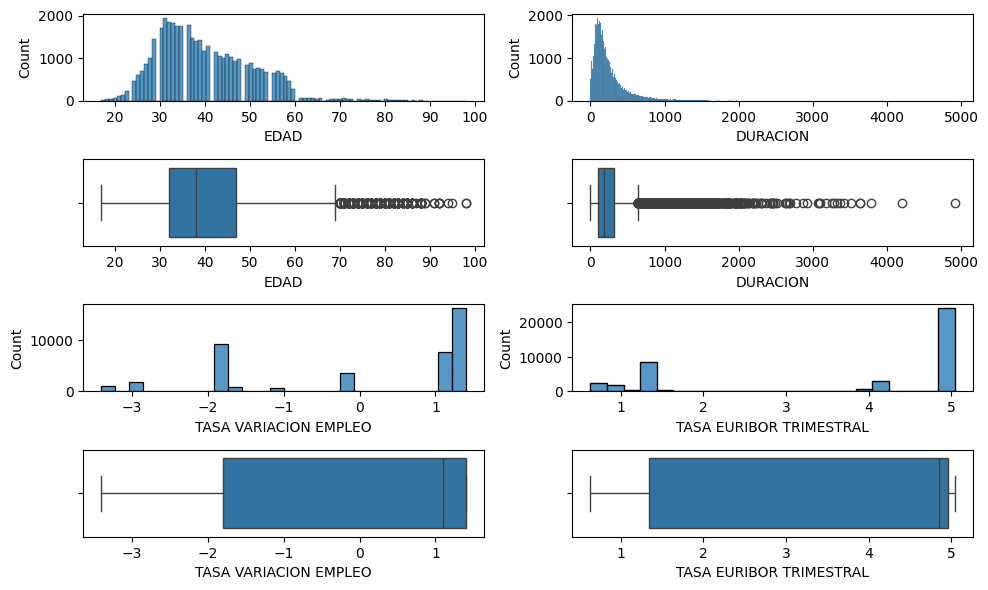

In [144]:
print("ANALISIS UNIVARIANTE DE NUMERICAS")
fig, axis = plt.subplots(4, 2, figsize = (10, 6))

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df_sin_duplicados, x = "age").set(xlabel = "EDAD")
sns.boxplot(ax = axis[1, 0], data = df_sin_duplicados, x = "age").set(xlabel = "EDAD")

sns.histplot(ax = axis[0, 1], data = df_sin_duplicados, x = "duration").set(xlabel = "DURACION")
sns.boxplot(ax = axis[1, 1], data = df_sin_duplicados, x = "duration").set(xlabel= "DURACION")

sns.histplot(ax = axis[2, 0], data = df_sin_duplicados, x = "emp.var.rate").set(xlabel = "TASA VARIACION EMPLEO")
sns.boxplot(ax = axis[3, 0], data = df_sin_duplicados, x = "emp.var.rate").set(xlabel="TASA VARIACION EMPLEO")

sns.histplot(ax = axis[2, 1], data = df_sin_duplicados, x = "euribor3m").set(xlabel = "TASA EURIBOR TRIMESTRAL")
sns.boxplot(ax = axis[3, 1], data = df_sin_duplicados, x = "euribor3m").set(xlabel= "TASA EURIBOR TRIMESTRAL")



# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [145]:
df_sin_duplicados["y_fact"] = pd.factorize(df_sin_duplicados["y"])[0]
df_sin_duplicados["job_fact"] = pd.factorize(df_sin_duplicados["job"])[0]
df_sin_duplicados["education_fact"] = pd.factorize(df_sin_duplicados["education"])[0]
df_sin_duplicados['poutcome_fact'] = pd.factorize(df_sin_duplicados["poutcome"])[0]
df_sin_duplicados['default_fact'] = pd.factorize(df_sin_duplicados["default"])[0]
df_sin_duplicados['housing_fact'] = pd.factorize(df_sin_duplicados["housing"])[0]
df_sin_duplicados['loan_fact'] = pd.factorize(df_sin_duplicados["loan"])[0]
df_sin_duplicados.head()

/tmp/ipykernel_671/617160707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_duplicados["y_fact"] = pd.factorize(df_sin_duplicados["y"])[0]
/tmp/ipykernel_671/617160707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_duplicados["job_fact"] = pd.factorize(df_sin_duplicados["job"])[0]
/tmp/ipykernel_671/617160707.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,age,job,education,default,housing,loan,duration,poutcome,emp.var.rate,euribor3m,y,y_fact,job_fact,education_fact,poutcome_fact,default_fact,housing_fact,loan_fact
0,56,housemaid,basic.4y,no,no,no,261,nonexistent,1.1,4.857,no,0,0,0,0,0,0,0
1,57,services,high.school,unknown,no,no,149,nonexistent,1.1,4.857,no,0,1,1,0,1,0,0
2,37,services,high.school,no,yes,no,226,nonexistent,1.1,4.857,no,0,1,1,0,0,1,0
3,40,admin.,basic.6y,no,no,no,151,nonexistent,1.1,4.857,no,0,2,2,0,0,0,0
4,56,services,high.school,no,no,yes,307,nonexistent,1.1,4.857,no,0,1,1,0,0,0,1


---------------ANALISIS MULTIVARIANTE------------------
ANALISIS NUMERICO-NUMERICO


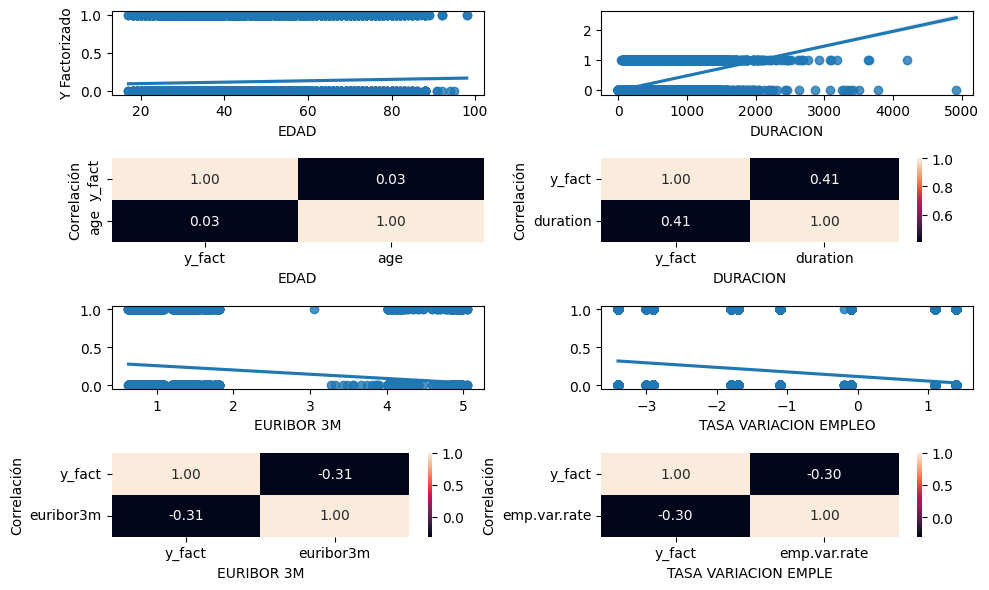

In [146]:
print("---------------ANALISIS MULTIVARIANTE------------------\nANALISIS NUMERICO-NUMERICO")
fig, axis = plt.subplots(4, 2, figsize=(10, 6))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax=axis[0, 0], data=df_sin_duplicados, x="age", y="y_fact")
axis[0, 0].set_xlabel("EDAD")
axis[0, 0].set_ylabel("Y Factorizado")

sns.heatmap(df_sin_duplicados[["y_fact", "age"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)
axis[1, 0].set_xlabel("EDAD")
axis[1, 0].set_ylabel("Correlación")

sns.regplot(ax=axis[0, 1], data=df_sin_duplicados, x="duration", y="y_fact").set(ylabel=None)
axis[0, 1].set_xlabel("DURACION")

sns.heatmap(df_sin_duplicados[["y_fact", "duration"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])
axis[1, 1].set_xlabel("DURACION")
axis[1, 1].set_ylabel("Correlación")

sns.regplot(ax=axis[2, 0], data=df_sin_duplicados, x="euribor3m", y="y_fact").set(ylabel=None)
axis[2, 0].set_xlabel("EURIBOR 3M")

sns.heatmap(df_sin_duplicados[["y_fact", "euribor3m"]].corr(), annot=True, fmt=".2f", ax=axis[3, 0])
axis[3, 0].set_xlabel("EURIBOR 3M")
axis[3, 0].set_ylabel("Correlación")

sns.regplot(ax=axis[2, 1], data=df_sin_duplicados, x="emp.var.rate", y="y_fact").set(ylabel=None)
axis[2, 1].set_xlabel("TASA VARIACION EMPLEO")

sns.heatmap(df_sin_duplicados[["y_fact", "emp.var.rate"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1])
axis[3, 1].set_xlabel("TASA VARIACION EMPLE")
axis[3, 1].set_ylabel("Correlación")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


In [147]:
df_sin_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   education       41176 non-null  object 
 3   default         41176 non-null  object 
 4   housing         41176 non-null  object 
 5   loan            41176 non-null  object 
 6   duration        41176 non-null  int64  
 7   poutcome        41176 non-null  object 
 8   emp.var.rate    41176 non-null  float64
 9   euribor3m       41176 non-null  float64
 10  y               41176 non-null  object 
 11  y_fact          41176 non-null  int64  
 12  job_fact        41176 non-null  int64  
 13  education_fact  41176 non-null  int64  
 14  poutcome_fact   41176 non-null  int64  
 15  default_fact    41176 non-null  int64  
 16  housing_fact    41176 non-null  int64  
 17  loan_fact       41176 non-null  int6

In [148]:
df_sin_duplicados.head()

,age,job,education,default,housing,loan,duration,poutcome,emp.var.rate,euribor3m,y,y_fact,job_fact,education_fact,poutcome_fact,default_fact,housing_fact,loan_fact
0,56,housemaid,basic.4y,no,no,no,261,nonexistent,1.1,4.857,no,0,0,0,0,0,0,0
1,57,services,high.school,unknown,no,no,149,nonexistent,1.1,4.857,no,0,1,1,0,1,0,0
2,37,services,high.school,no,yes,no,226,nonexistent,1.1,4.857,no,0,1,1,0,0,1,0
3,40,admin.,basic.6y,no,no,no,151,nonexistent,1.1,4.857,no,0,2,2,0,0,0,0
4,56,services,high.school,no,no,yes,307,nonexistent,1.1,4.857,no,0,1,1,0,0,0,1


-----------------ANALISIS NUMERICO - CATEGORICO (ANALISIS COMPLETO)
CORRELACION DE TODAS LAS VARABLES


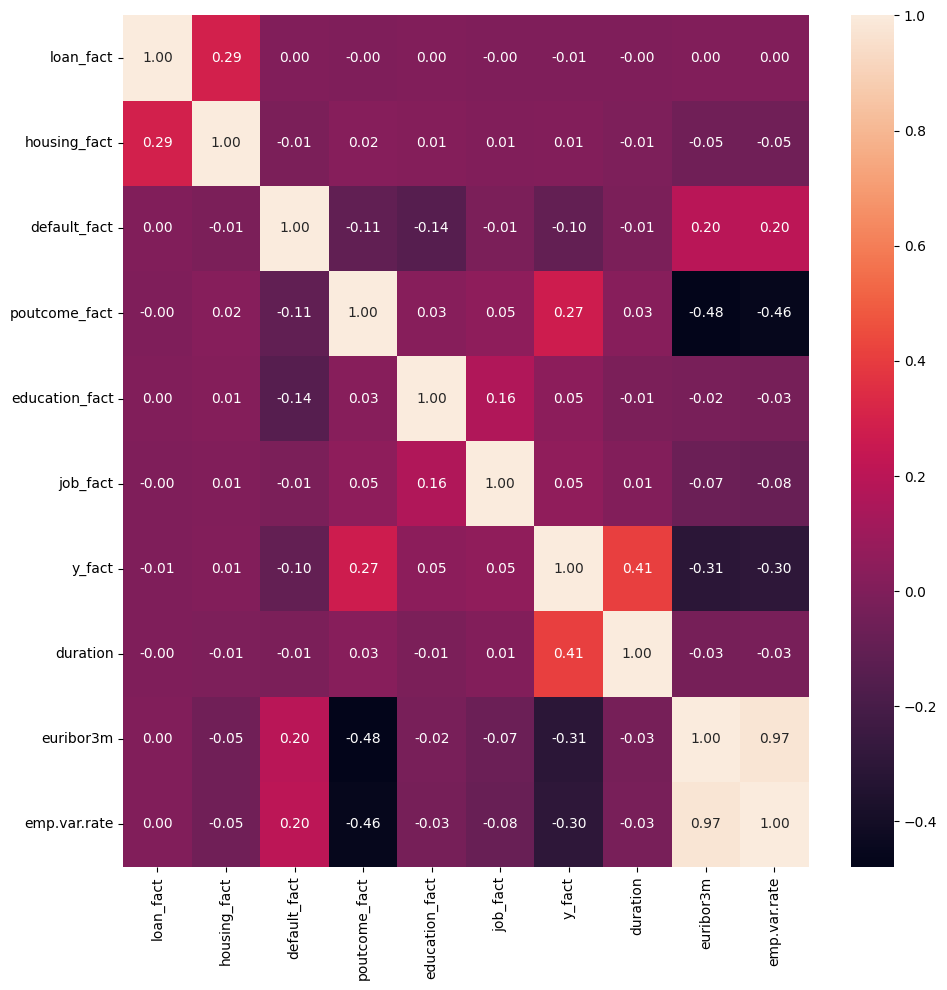

In [149]:
print("-----------------ANALISIS NUMERICO - CATEGORICO (ANALISIS COMPLETO)\nCORRELACION DE TODAS LAS VARABLES")
fig, axis = plt.subplots(figsize = (10, 10))

sns.heatmap(df_sin_duplicados[["loan_fact", "housing_fact", "default_fact", "poutcome_fact", "education_fact", "job_fact", "y_fact", "duration","euribor3m","emp.var.rate"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

----------------VALORES ATIPICOS-----------------



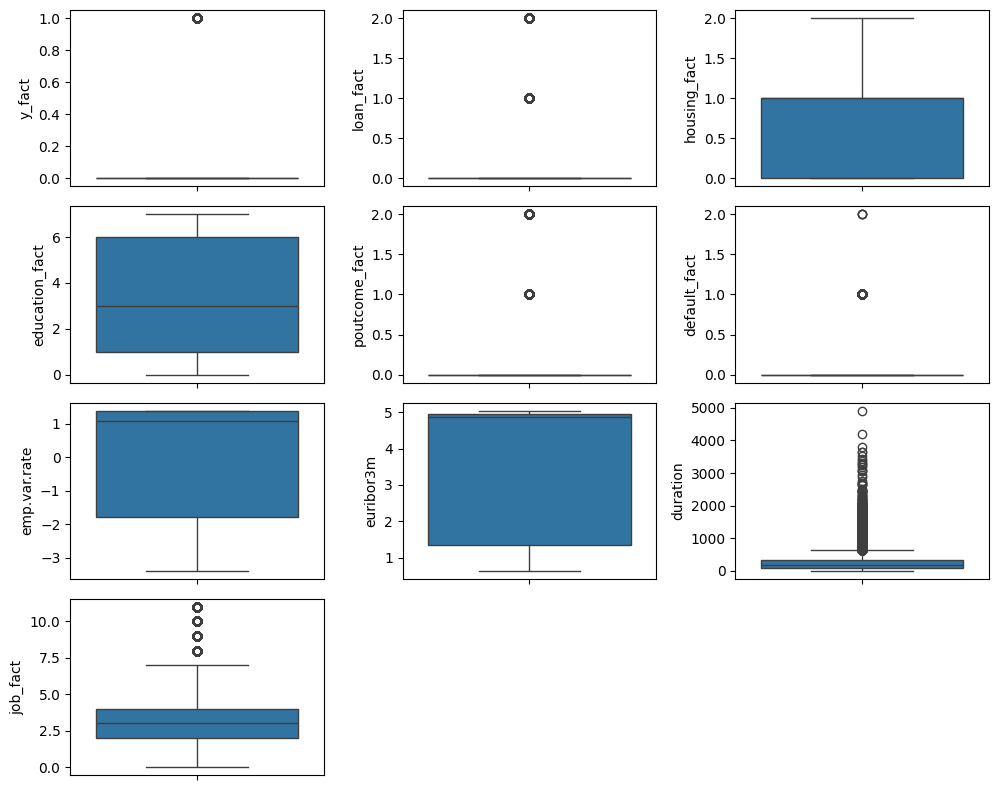

In [150]:
print("----------------VALORES ATIPICOS-----------------\n")
fig, axis = plt.subplots(4, 3, figsize = (10, 8))

sns.boxplot(ax = axis[0, 0], data = df_sin_duplicados, y = "y_fact")
sns.boxplot(ax = axis[0, 1], data = df_sin_duplicados, y = "loan_fact")
sns.boxplot(ax = axis[0, 2], data = df_sin_duplicados, y = "housing_fact")
sns.boxplot(ax = axis[1, 0], data = df_sin_duplicados, y = "education_fact")
sns.boxplot(ax = axis[1, 1], data = df_sin_duplicados, y = "poutcome_fact")
sns.boxplot(ax = axis[1, 2], data = df_sin_duplicados, y = "default_fact")
sns.boxplot(ax = axis[2, 0], data = df_sin_duplicados, y = "emp.var.rate")
sns.boxplot(ax = axis[2, 1], data = df_sin_duplicados, y = "euribor3m")
sns.boxplot(ax = axis[2, 2], data = df_sin_duplicados, y = "duration")
sns.boxplot(ax = axis[3, 0], data = df_sin_duplicados, y = "job_fact")
fig.delaxes(axis[3, 1])
fig.delaxes(axis[3, 2])
plt.tight_layout()

plt.show()

In [151]:
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1 = df_sin_duplicados['duration'].quantile(0.25)
Q3 = df_sin_duplicados['duration'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 644.5 y -223.5, con un rango intercuartílico de 217.0


In [152]:
duracion_atipica = df_sin_duplicados[df_sin_duplicados["duration"] >= upper_limit]
duracion_atipica


,age,job,education,default,housing,loan,duration,poutcome,emp.var.rate,euribor3m,y,y_fact,job_fact,education_fact,poutcome_fact,default_fact,housing_fact,loan_fact
37,52,technician,basic.9y,no,yes,no,1666,nonexistent,1.1,4.857,no,0,4,3,0,0,1,0
57,45,services,high.school,unknown,yes,no,787,nonexistent,1.1,4.857,no,0,1,1,0,1,1,0
61,51,blue-collar,basic.9y,no,yes,no,812,nonexistent,1.1,4.857,no,0,3,3,0,0,1,0
75,41,blue-collar,basic.4y,unknown,yes,no,1575,nonexistent,1.1,4.857,yes,1,3,0,0,1,1,0
83,49,entrepreneur,university.degree,unknown,yes,no,1042,nonexistent,1.1,4.857,yes,1,10,6,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41147,25,technician,professional.course,no,yes,no,712,success,-1.1,1.040,yes,1,4,4,2,0,1,0
41153,67,housemaid,professional.course,no,yes,no,655,success,-1.1,1.039,yes,1,0,4,2,0,1,0
41160,33,admin.,university.degree,no,no,no,843,nonexistent,-1.1,1.035,yes,1,2,6,0,0,0,0
41164,54,admin.,professional.course,no,no,no,1868,success,-1.1,1.035,yes,1,2,4,2,0,0,0


In [153]:
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1 = df_sin_duplicados['job_fact'].quantile(0.25)
Q3 = df_sin_duplicados['job_fact'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 7.0 y -1.0, con un rango intercuartílico de 2.0


In [154]:
trabajos_atipicos = df_sin_duplicados[df_sin_duplicados["job_fact"] >= upper_limit]
trabajos_atipicos

,age,job,education,default,housing,loan,duration,poutcome,emp.var.rate,euribor3m,y,y_fact,job_fact,education_fact,poutcome_fact,default_fact,housing_fact,loan_fact
20,30,unemployed,high.school,no,no,no,38,nonexistent,1.1,4.857,no,0,7,1,0,0,0,0
27,39,self-employed,basic.9y,unknown,no,no,233,nonexistent,1.1,4.857,no,0,8,3,0,1,0,0
29,55,unknown,university.degree,unknown,unknown,unknown,362,nonexistent,1.1,4.857,no,0,9,6,0,1,2,2
35,55,unknown,basic.4y,unknown,yes,no,336,nonexistent,1.1,4.857,no,0,9,0,0,1,1,0
41,32,entrepreneur,high.school,no,yes,no,314,nonexistent,1.1,4.857,no,0,10,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41138,58,unemployed,university.degree,no,yes,no,344,nonexistent,-1.1,1.041,yes,1,7,6,0,0,1,0
41168,38,entrepreneur,university.degree,no,no,no,144,nonexistent,-1.1,1.030,no,0,10,6,0,0,0,0
41171,33,student,professional.course,no,yes,no,112,nonexistent,-1.1,1.031,yes,1,11,4,0,0,1,0
41175,34,student,unknown,no,yes,no,180,failure,-1.1,1.031,no,0,11,5,1,0,1,0


In [156]:
print("------------------ESCALADO DE LOS DATOS--------------------------\n")
# Dividimos el conjunto de datos en muestras de train y test
X = df_sin_duplicados.drop("y_fact", axis = 1)
y = df_sin_duplicados["y_fact"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

------------------ESCALADO DE LOS DATOS--------------------------



,age,job,education,default,housing,loan,duration,poutcome,emp.var.rate,euribor3m,y,job_fact,education_fact,poutcome_fact,default_fact,housing_fact,loan_fact
12348,29,entrepreneur,basic.6y,no,yes,yes,286,nonexistent,1.4,4.959,no,10,2,0,0,1,1
8565,50,admin.,university.degree,no,no,no,178,nonexistent,1.4,4.864,no,2,6,0,0,0,0
21424,29,admin.,university.degree,no,no,no,103,nonexistent,1.4,4.963,no,2,6,0,0,0,0
3316,35,admin.,university.degree,no,no,no,135,nonexistent,1.1,4.860,no,2,6,0,0,0,0
33246,40,blue-collar,high.school,unknown,no,no,418,nonexistent,-1.8,1.291,no,3,1,0,1,0,0
